## First Analysis of the proteins

I aim to perform further analysis on the PHA-Depolymerases protein family. Therefore, I decided to do some analysis on the organism. There are methods to categorize the organism as well as to sort the proteins after length and find the family that the proteins belong to. 

In [14]:
%reload_ext autoreload
%autoreload 2

from pyeed.core import Organism
from pyeed.fetchers import NCBITaxonomyFetcher
from pyeed.core import ProteinInfo
from pyeed.containers import MMSeqs2
from PHA_Depolymerasen.tools.tools import categorize_len
from PHA_Depolymerasen.tools.tools import categorize_organism
from PHA_Depolymerasen.tools.tools import find_family
from pathlib import Path
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'PHA_Depolymerasen'

Import all the found proteins of the family from the blast search. 

In [5]:
sequences_1 = []
for path in Path("./blast_results/blast_results_1").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_1.append(ProteinInfo.from_json(f)) 

sequences_2 = []
for path in Path("./blast_results/blast_results_2").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_2.append(ProteinInfo.from_json(f)) 

sequences_3 = []
for path in Path("./blast_results/blast_results_3").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_3.append(ProteinInfo.from_json(f)) 

sequences_4 = []
for path in Path("./blast_results/blast_results_4").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_4.append(ProteinInfo.from_json(f)) 

sequences_5 = []
for path in Path("./blast_results/blast_results_5").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_5.append(ProteinInfo.from_json(f)) 

sequences_6 = []
for path in Path("./blast_results/blast_results_6").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_6.append(ProteinInfo.from_json(f)) 

sequences_7 = []
for path in Path("./blast_results/blast_results_7").rglob("*.json"):
    with open(str(path.absolute())) as f:
        sequences_7.append(ProteinInfo.from_json(f)) 


In [7]:
sequences = []
i = 0
while i < 7:
    for path in Path("./blast_results/blast_results_" + str(i+1)).rglob("*.json"):
        with open(str(path.absolute())) as f:
            sequences.append(ProteinInfo.from_json(f)) 
    i = i + 1

Perform a clustering with the MM2Seq Clustering Tool.  
The input are the sewurnces that should be clustered as well as the wanted coverage and the identity. Coverage means in this case ... and identity. I decided to go with ... since the database I was looking for proteins was already clustered by 90% identity. 

In [4]:
representatives_1 = MMSeqs2.easy_cluster(
    sequences=sequences_1,
    coverage=0.8,
    identity=0,
)

representatives_2 = MMSeqs2.easy_cluster(
    sequences=sequences_2,
    coverage=0.8,
    identity=0,
)

representatives_3 = MMSeqs2.easy_cluster(
    sequences=sequences_3,
    coverage=0.8,
    identity=0,
)

representatives_4 = MMSeqs2.easy_cluster(
    sequences=sequences_4,
    coverage=0.8,
    identity=0,
)

representatives_5 = MMSeqs2.easy_cluster(
    sequences=sequences_5,
    coverage=0.8,
    identity=0,
)

representatives_6 = MMSeqs2.easy_cluster(
    sequences=sequences_6,
    coverage=0.8,
    identity=0,
)

representatives_7 = MMSeqs2.easy_cluster(
    sequences=sequences_7,
    coverage=0.8,
    identity=0,
)

🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 6401
├── min. coverage: 80 %
╰── min. sequence identity: 0 %
🎉 Clustered intitial sequences in 185 representative sequences
🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 8762
├── min. coverage: 80 %
╰── min. sequence identity: 0 %
🎉 Clustered intitial sequences in 378 representative sequences
🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 57975
├── min. coverage: 80 %
╰── min. sequence identity: 0 %
🎉 Clustered intitial sequences in 1571 representative sequences
🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 13810
├── min. coverage: 80 %
╰── min. sequence identity: 0 %
🎉 Clustered intitial sequences in 467 representative sequences
🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 11970
├── min. coverage: 80 %
╰── min. sequence identity: 0 %
🎉 Clustered intitial sequences in 1028 representative sequences
🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 716

In [10]:
representatives = MMSeqs2.easy_cluster(
    sequences=sequences, 
    coverage=0.8,
    identity=0.6
)

🏃 Clustering sequences with MMSeqs2...
╭── initial sequences: 0
├── min. coverage: 80 %
╰── min. sequence identity: 60 %
2024-04-11 13:18:02,931 - ERROR - mmseqs2.py:159 - run_container() - Error running ToolImage.MMSEQS2 container: Command 'mmseqs easy-cluster /app/input.fasta /app/result temp -c 0.8 --cov-mode 0 --min-seq-id 0.6 --alignment-mode 3 --alignment-output-mode 0 --cluster-mode 0 ' in image 'sha256:08a2e3a2d4c34d84e8d470e12c18b47ad2cc0200d4842f07c063495392388126' returned non-zero exit status 1


TypeError: 'NoneType' object is not subscriptable

Sort the proteins with regard to the family. The methods returns all the proteins that belong to the chosen family (in the method) and all the others. It is important to mention that the proteins are only sorted after the annotation which means there are probably more proteins that belong to this family but do not have "depolymerase" in the name. But it is still a good method for a first overview.

In [ ]:
depolymerases, different = find_family(sequences, "depolymerase")
print("Number of Depolymerases: " + str(len(depolymerases)))
print("Numbers of different types: " + str(len(different)))

Analyse the proteins with regard to the categorization of the organism. You can choose between kingom, domain or pyhlum. The function prints the composition of the whole set of proteins in percentage. 

In [72]:
kingdom = categorize_organism(representatives, "kingdom")
print(kingdom.keys())

domain = categorize_organism(representatives, "domain")
print(domain.keys())

phylum = categorize_organism(representatives, "phylum")
print(phylum.keys())

Kingdoms: 
Percentage of None: 0.8756%
Percentage of Fungi: 0.0538%
Percentage of Metazoa: 0.0648%
Percentage of Viridiplantae: 0.0058%
Domains: 
Percentage of Bacteria: 0.8391%
Percentage of Eukaryota: 0.1399%
Percentage of Archaea: 0.0206%
Percentage of None: 0.0003%
Phylum: 
Percentage of Pseudomonadota: 0.4587%
Percentage of Mucoromycota: 0.011%
Percentage of Verrucomicrobiota: 0.0064%
Percentage of Actinomycetota: 0.0874%
Percentage of None: 0.029%
Percentage of Chloroflexota: 0.0477%
Percentage of Bacteroidota: 0.0351%
Percentage of Bacillota: 0.0435%
Percentage of Nitrososphaerota: 0.0039%
Percentage of Euryarchaeota: 0.0064%
Percentage of Bdellovibrionota: 0.0116%
Percentage of Nematoda: 0.0087%
Percentage of Planctomycetota: 0.0184%
Percentage of Candidatus Gracilibacteria: 0.0026%
Percentage of Arthropoda: 0.0203%
Percentage of Rotifera: 0.0245%
Percentage of Ascomycota: 0.0206%
Percentage of Mollusca: 0.0045%
Percentage of Nitrospirota: 0.0026%
Percentage of Acidobacteriota:

Creating Piecharts to visualize the composition of domain and kingdom. 

In [43]:
kingdom_none = len(kingdom[None])
kingdom_fungi = len(kingdom['Fungi'])
kingdom_metazoa = len(kingdom['Metazoa'])
kingdom_viri = len(kingdom['Viridiplantae'])

lenght = len(representatives)

domain_bacteria = len(domain['Bacteria'])
domain_eukaryota = len(domain['Eukaryota'])
domain_archaea = len(domain['Archaea'])
domain_none = len(domain[None])

([<matplotlib.patches.Wedge at 0x3f7568f40>,
 [Text(-0.96294788423064, 0.53172490279818, 'Bacteria'),
  Text(0.9264728428186785, -0.5929992171322628, 'Eukaryota'),
  Text(1.0976886548941802, -0.07127143127934023, 'Archaea')])

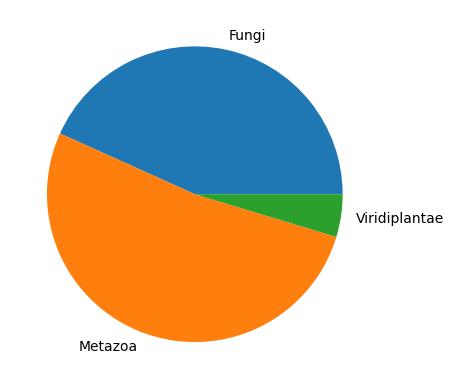

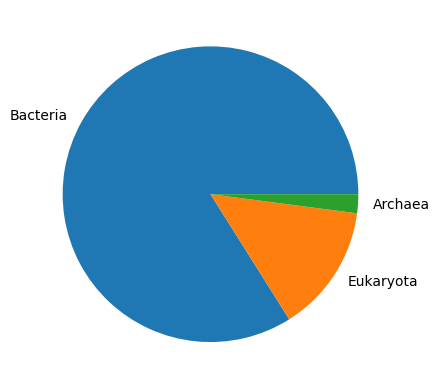

In [44]:
labels = 'Fungi', 'Metazoa', 'Viridiplantae'
sizes = [kingdom_fungi, kingdom_metazoa, kingdom_viri]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

labels = 'None', 'Fungi', 'Metazoa', 'Viridiplantae'
sizes = [kingdom_none, kingdom_fungi, kingdom_metazoa, kingdom_viri]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

labels = 'Bacteria', 'Eukaryota', 'Archaea'
sizes = [domain_bacteria, domain_eukaryota, domain_archaea]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

Sort the proteins with regard to the length of the sequence and print the number of proteins that belong to the according category.  
Small < 100, middle < 300, long > 300

In [ ]:
small, middle, long = categorize_len(sequences)
print(f"Number of small proteins:{len(small)}")
print(f"Number of middle length proteins:{len(middle)}")
print(f"Number of long proteins:{len(long)}")